In [1]:
import pandas as pd
import numpy as np
import os

In [ ]:
# get all folder names in HistoricalData that doesn't end with zip
folder_names = [x for x in os.listdir('HistoricalData') if not x.endswith('.zip')]
print(folder_names)

['02_08_to_09_08', '10_07_to_17_07', '10_08_to_17_08', '12_06_to_24_06', '18_07_to_25_07', '18_08_to_25_08', '26_07_to_01_08', '26_08_to_02_09', '28_06_to_07_07']


In [ ]:
# load all csv files in HistoricalData\[folder_names]\[folder_names] folder
data = pd.DataFrame()
for folder in folder_names:
    print(folder)
    path = r'HistoricalData/' + folder + '/' + folder
    all_files = os.listdir(path)
    all_files = [path + '\\' + file for file in all_files]

    for file in all_files:
        # only take the csv files
        if not file.endswith('.csv'):
            continue
        try:
            df = pd.read_csv(file, encoding='utf-8')
            df = df.reset_index(drop=True)
            # only get the data for the two sensors CH:0056.05 and CH:0342.01 in the MSR_Id column
            df = df[df['MSR_Id'].isin(['CH:0056.05', 'CH:0342.01'])]
            data = pd.concat([data, df])
        except UnicodeDecodeError:
            print(f"Skipping file due to encoding issue: {file}")

data = data.reset_index(drop=True)
print(data.shape)

02_08_to_09_08
10_07_to_17_07
10_08_to_17_08
12_06_to_24_06
18_07_to_25_07
18_08_to_25_08
26_07_to_01_08
26_08_to_02_09
28_06_to_07_07
(209526, 8)


In [ ]:
data

,MSR_Id,TimeStamp,CarFlow,LorryFlow,AnyFlow,CarSpeed,LorrySpeed,AnySpeed
0,CH:0342.01,2023-08-01T21:59:00.000000Z,180.0,0.0,0.0,138.699997,NaN,NaN
1,CH:0056.05,2023-08-01T21:59:00.000000Z,420.0,0.0,0.0,103.900002,NaN,NaN
2,CH:0342.01,2023-08-01T22:00:00.000000Z,60.0,0.0,0.0,122.000000,NaN,NaN
3,CH:0056.05,2023-08-01T22:00:00.000000Z,660.0,0.0,0.0,100.400002,NaN,NaN
4,CH:0342.01,2023-08-01T22:01:00.000000Z,60.0,0.0,0.0,106.000000,NaN,NaN
...,...,...,...,...,...,...,...,...
209521,CH:0056.05,2023-07-07T08:55:00.000000Z,1440.0,0.0,0.0,100.300003,NaN,NaN
209522,CH:0342.01,2023-07-07T08:56:00.000000Z,1020.0,0.0,0.0,111.800003,NaN,NaN
209523,CH:0056.05,2023-07-07T08:56:00.000000Z,1440.0,0.0,0.0,94.900002,NaN,NaN
209524,CH:0342.01,2023-07-07T08:57:00.000000Z,720.0,0.0,0.0,115.300003,NaN,NaN


In [ ]:
# save data as csv file
data.to_csv('two_sensors_data.csv', index=False)

In [ ]:
# first sensor
data.loc[data["MSR_Id"]=="CH:0056.05"]

,MSR_Id,TimeStamp,CarFlow,LorryFlow,AnyFlow,CarSpeed,LorrySpeed,AnySpeed
1,CH:0056.05,2023-08-01T21:59:00.000000Z,420.0,0.0,0.0,103.900002,NaN,NaN
3,CH:0056.05,2023-08-01T22:00:00.000000Z,660.0,0.0,0.0,100.400002,NaN,NaN
5,CH:0056.05,2023-08-01T22:01:00.000000Z,300.0,0.0,0.0,100.199997,NaN,NaN
7,CH:0056.05,2023-08-01T22:02:00.000000Z,180.0,0.0,0.0,104.300003,NaN,NaN
9,CH:0056.05,2023-08-01T22:03:00.000000Z,180.0,0.0,0.0,103.699997,NaN,NaN
...,...,...,...,...,...,...,...,...
209517,CH:0056.05,2023-07-07T08:53:00.000000Z,1800.0,60.0,0.0,94.000000,82.0,NaN
209519,CH:0056.05,2023-07-07T08:54:00.000000Z,1800.0,120.0,0.0,95.699997,100.5,NaN
209521,CH:0056.05,2023-07-07T08:55:00.000000Z,1440.0,0.0,0.0,100.300003,NaN,NaN
209523,CH:0056.05,2023-07-07T08:56:00.000000Z,1440.0,0.0,0.0,94.900002,NaN,NaN


In [ ]:
# find nan values in "CarFlow" and "CarSpeed" in data.loc[data["MSR_Id"]=="CH:0056.05"]
data.loc[data["MSR_Id"]=="CH:0056.05"]["CarFlow"].isna().sum()

807

In [ ]:
data.loc[data["MSR_Id"]=="CH:0056.05"]["CarSpeed"].isna().sum()

5935

In [2]:
# load filtered\CH_0056.05_interpolated_v2.csv
sensor_one = pd.read_csv('filtered/CH_0056.05_interpolated_v2.csv', encoding='utf-8')
sensor_one

,MSR_Id,TimeStamp,CarFlow,LorryFlow,AnyFlow,CarSpeed,LorrySpeed,AnySpeed
0,CH:0056.05,2023-06-12T18:24:00.000000Z,780.0,0,0,107.699997,0.0,NaN
1,CH:0056.05,2023-06-12T18:25:00.000000Z,780.0,0,0,102.000000,0.0,NaN
2,CH:0056.05,2023-06-12T18:26:00.000000Z,1080.0,0,0,103.599998,0.0,NaN
3,CH:0056.05,2023-06-12T18:27:00.000000Z,600.0,0,0,102.099998,0.0,NaN
4,CH:0056.05,2023-06-12T18:28:00.000000Z,660.0,0,0,99.599998,0.0,NaN
...,...,...,...,...,...,...,...,...
104758,CH:0056.05,2023-09-02T21:53:00.000000Z,840.0,0,0,98.400002,0.0,NaN
104759,CH:0056.05,2023-09-02T21:54:00.000000Z,960.0,0,0,97.300003,0.0,NaN
104760,CH:0056.05,2023-09-02T21:55:00.000000Z,840.0,0,0,100.400002,0.0,NaN
104761,CH:0056.05,2023-09-02T21:56:00.000000Z,540.0,0,0,102.300003,0.0,NaN


In [3]:
# load filtered\CH_0342.01_interpolated_v2.csv
sensor_two = pd.read_csv('filtered/CH_0342.01_interpolated_v2.csv', encoding='utf-8')
sensor_two

,MSR_Id,TimeStamp,CarFlow,LorryFlow,AnyFlow,CarSpeed,LorrySpeed,AnySpeed
0,CH:0342.01,2023-06-12T18:24:00.000000Z,180.0,0.0,0.0,119.000000,0.0,NaN
1,CH:0342.01,2023-06-12T18:25:00.000000Z,360.0,0.0,0.0,117.699997,0.0,NaN
2,CH:0342.01,2023-06-12T18:26:00.000000Z,420.0,0.0,0.0,129.699997,0.0,NaN
3,CH:0342.01,2023-06-12T18:27:00.000000Z,360.0,0.0,0.0,122.300003,0.0,NaN
4,CH:0342.01,2023-06-12T18:28:00.000000Z,300.0,0.0,0.0,123.599998,0.0,NaN
...,...,...,...,...,...,...,...,...
104758,CH:0342.01,2023-09-02T21:53:00.000000Z,300.0,0.0,0.0,119.800003,0.0,110.0
104759,CH:0342.01,2023-09-02T21:54:00.000000Z,240.0,0.0,0.0,123.000000,0.0,110.0
104760,CH:0342.01,2023-09-02T21:55:00.000000Z,360.0,0.0,0.0,124.000000,0.0,110.0
104761,CH:0342.01,2023-09-02T21:56:00.000000Z,240.0,0.0,0.0,120.000000,0.0,110.0


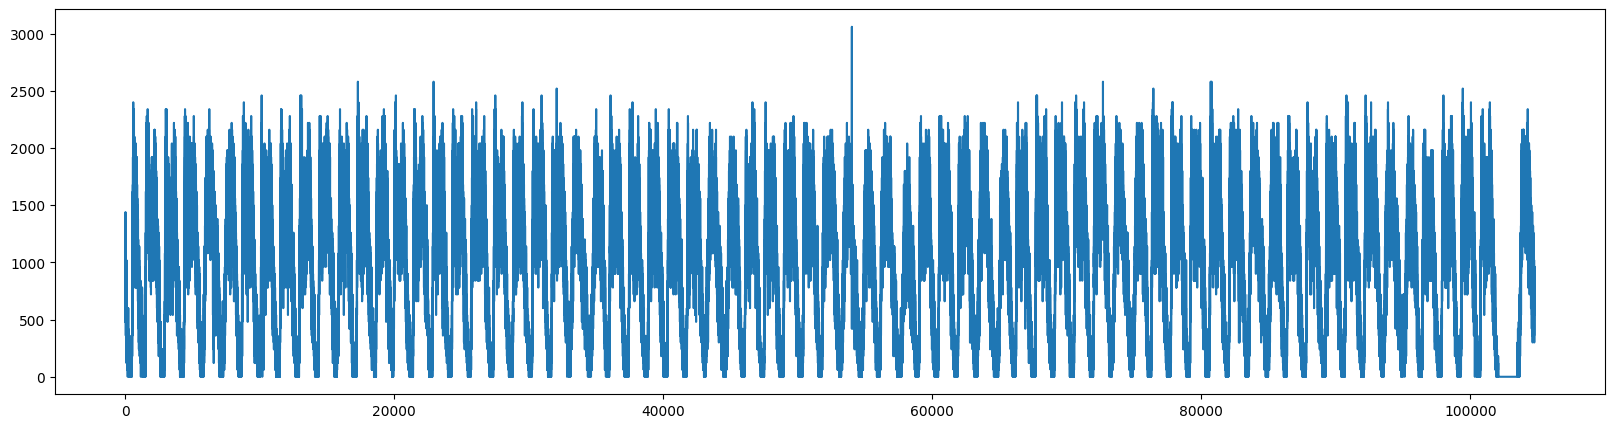

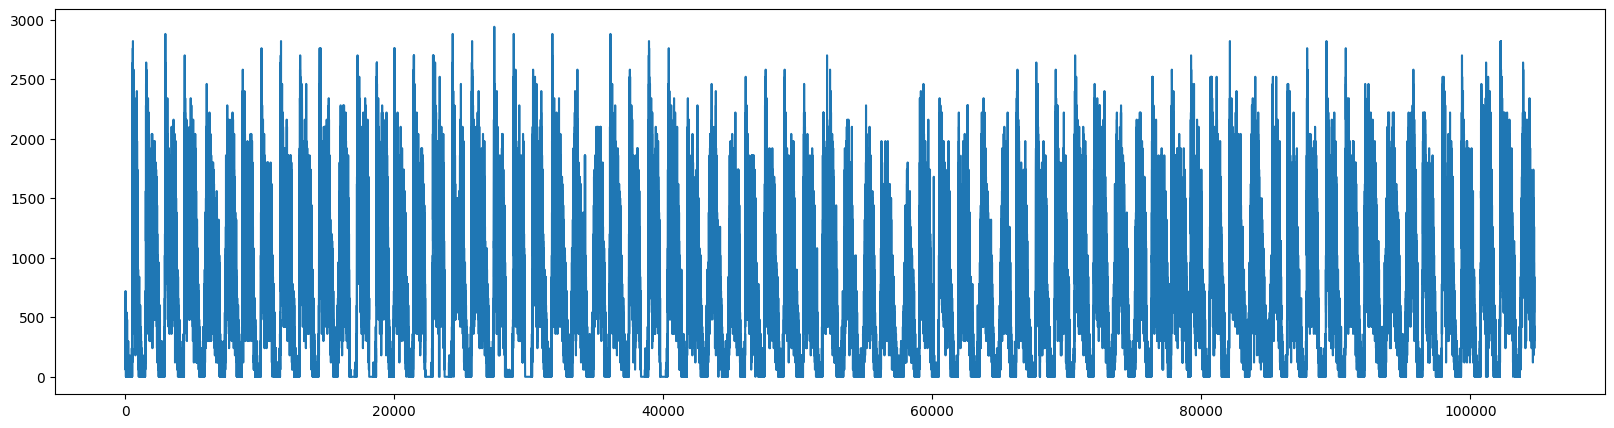

(104763, 8)


In [4]:
# visualize the time series data of the first sensor
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(sensor_one.loc[sensor_one["MSR_Id"]=="CH:0056.05"]["CarFlow"])
plt.show()

plt.figure(figsize=(20,5))
plt.plot(sensor_two.loc[sensor_two["MSR_Id"]=="CH:0342.01"]["CarFlow"])
plt.show()

print(sensor_one.shape)

In [ ]:
# second sensor
df.loc[df["MSR_Id"]=="CH:0342.01"]

,MSR_Id,TimeStamp,CarFlow,LorryFlow,AnyFlow,CarSpeed,LorrySpeed,AnySpeed
258,CH:0342.01,2023-08-01T21:59:00.000000Z,180.0,0.0,0.0,138.699997,NaN,NaN
2050,CH:0342.01,2023-08-01T22:00:00.000000Z,60.0,0.0,0.0,122.000000,NaN,NaN
3842,CH:0342.01,2023-08-01T22:01:00.000000Z,60.0,0.0,0.0,106.000000,NaN,NaN
5634,CH:0342.01,2023-08-01T22:02:00.000000Z,120.0,0.0,0.0,130.000000,NaN,NaN
7426,CH:0342.01,2023-08-01T22:03:00.000000Z,120.0,0.0,0.0,117.000000,NaN,NaN
...,...,...,...,...,...,...,...,...
20626178,CH:0342.01,2023-08-09T21:54:00.000000Z,60.0,0.0,0.0,135.000000,NaN,NaN
20627970,CH:0342.01,2023-08-09T21:55:00.000000Z,0.0,0.0,0.0,NaN,NaN,NaN
20629762,CH:0342.01,2023-08-09T21:56:00.000000Z,0.0,0.0,0.0,NaN,NaN,NaN
20631554,CH:0342.01,2023-08-09T21:57:00.000000Z,60.0,0.0,0.0,118.000000,NaN,NaN


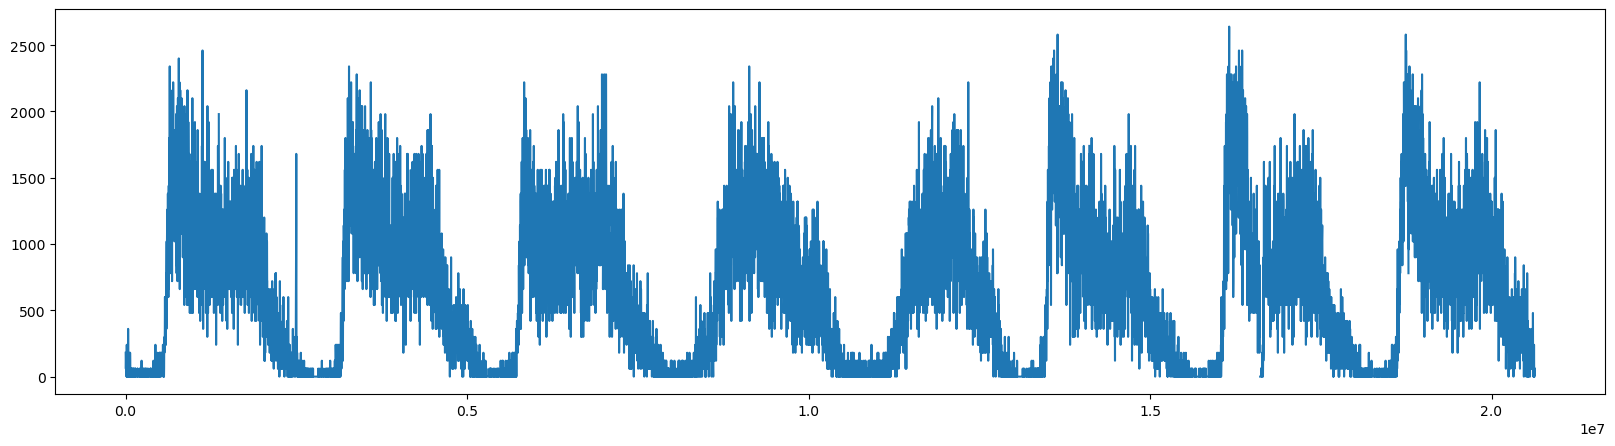

In [ ]:
# visualize the time series data of the first sensor
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df.loc[df["MSR_Id"]=="CH:0342.01"]["CarFlow"])
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Subset, Dataset, DataLoader
from datetime import datetime
from tqdm import tqdm

In [ ]:
# split the first sensor data into train, test, and val set with sklearn
from sklearn.model_selection import train_test_split
train, test = train_test_split(sensor_one, test_size=0.1, shuffle=False)
train, val = train_test_split(train, test_size=0.1, shuffle=False)
print(train.shape)
print(test.shape)
print(val.shape)

(41950, 8)
(5180, 8)
(4662, 8)


In [ ]:
class TraficDataset(Dataset):
    """Trafic dataset
        We return as input data the three hours after the given index (so 180 * 4 floats)
        We return as target the next 5,10,15,...,175,180 minutes after the last input point
    ."""

    def __init__(self, csv_file, timeshift=150, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            timeshift: The number of minute after the end of the input sample for the target
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.trafic = pd.read_csv(csv_file)
        self.transform = transform
        self.timeshift = timeshift
        self.date_format = '%Y-%m-%dT%H:%M:%S.000000Z'

    def __len__(self):
        # Since we need to predict for the next 3 hours, we do not include the last point in the training data
        # Also, for training, the idx is the index of the last time point, we check the 3 hours before (180 points)
        # return len(self.trafic)-500
        return len(self.trafic)//10  # For testing onl

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        inputs = []
        outputs = []
        for i in range(180):
            # The timestamp is an issue, the number is way to big now
            date = datetime.strptime(self.trafic.loc[i+idx, "TimeStamp"], self.date_format)
            inputs.append(float(date.weekday())/6.0)
            inputs.append(float(date.hour)/23.0)
            inputs.append(float(date.minute)/60.0)
            inputs.append(float(self.trafic.loc[i+idx, "CarFlow"])/1500.0)
            inputs.append(float(self.trafic.loc[i+idx, "CarSpeed"])/130.0)

        outputs.append(float(self.trafic.loc[idx+180+self.timeshift, "CarFlow"])/1000.0)
        outputs.append(float(self.trafic.loc[idx+180+self.timeshift, "CarSpeed"])/130.0)
        inputs = torch.FloatTensor(inputs)
        outputs = torch.FloatTensor(outputs)
        sample = {'inputs': inputs, 'outputs': outputs}

        return sample

In [ ]:
class FNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(FNN, self).__init__()

        self.linear1 = nn.Linear(input_dim, 2048)
        self.linear2 = nn.Linear(2048, 1024)
        self.linear3 = nn.Linear(1024, 256)
        self.linear4 = nn.Linear(256, 64)
        self.linear5 = nn.Linear(64, output_dim)

        self.ReLU = nn.ReLU()

    def forward(self, x):
        x = self.ReLU(self.linear1(x))
        x = self.ReLU(self.linear2(x))
        x = self.ReLU(self.linear3(x))
        x = self.ReLU(self.linear4(x))
        x = self.linear5(x)
        return x

In [ ]:
def train(train_dataloader, model: torch.nn.Module, criterion: torch.nn.MSELoss, optimizer: torch.optim.Adam):
    model.train()
    losses = []

    for batch, data in enumerate(train_dataloader):
        optimizer.zero_grad()
        pred = model(data["inputs"]).float()

        loss = criterion(pred, data["outputs"])

        loss.backward()

        optimizer.step()

        losses.append(loss.detach())

        print(f'avg_train_loss: {sum(losses)/(batch+1)}')

    return losses

In [ ]:
def test(test_dataloader, model: torch.nn.Module, criterion: torch.nn.MSELoss):
    model.eval()
    losses = []

    with torch.no_grad():
        for batch, data in enumerate(test_dataloader):

            x = data['inputs']
            y = data['outputs']

            x = x.float()
            y = y.float()

            pred = model(x)

            loss = criterion(pred, y)
            loss = loss.float()

            losses.append(loss.detach().numpy())

    return losses

In [ ]:
def train_nn(csv_file):

    dataset = TraficDataset(csv_file)

    # Define the size of the training set (e.g., 80%)
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size

    # Create indices for the training and testing subsets
    train_indices = list(range(train_size))
    test_indices = list(range(train_size, len(dataset)))

    # Create Subset datasets for train and test
    train_dataset = Subset(dataset, train_indices)
    test_dataset = Subset(dataset, test_indices)

    train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


    model = FNN(input_dim=900, output_dim=2)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.002)  # 0.0001
    criterion = nn.MSELoss()
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer=optimizer,
        mode='min',
        factor=0.1,
        patience=5,
    )

    train_losses = []

    for epoch in range(1):
        print('epoch:', epoch)
        train_loss = train(train_loader, model, criterion, optimizer)
        train_losses.append(train_loss)
        scheduler.step(np.mean(train_losses))
        torch.save(model.state_dict(), f'dataset/epoch_{epoch}.pth')

    test_loss = test(test_loader, model, criterion)
    print(f'avg_test_loss: {sum(test_loss) / test_size}')

In [ ]:
train_nn(csv_file="filtered/CH_0056.05_interpolated_v2.csv")

In [18]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from dateutil import parser
from tqdm import tqdm

In [ ]:
df = pd.read_csv('filtered/CH_0056.05_interpolated_v2.csv')

time_stamp_raw = df['TimeStamp']
car_flow_raw = df['CarFlow']
car_speed_raw = df['CarSpeed']

time_steps = 180

inputs = []
outputs = []

# for i in tqdm(range(len(time_stamp_raw)-time_steps)):
for i in tqdm(range(10000)):

  input_mid = []
  output = []

  for j in range(time_steps):

    date = parser.isoparse(time_stamp_raw[j])
    year, week, weekday = date.isocalendar()

    input = []

    input.append(float(weekday))
    input.append(float(date.hour))
    input.append(float(date.minute))
    input.append(float(car_flow_raw[j]))
    input.append(float(car_speed_raw[j]))

    input_mid.append(input)

  inputs.append(input_mid)

  output.append(float(car_flow_raw[i+time_steps]))
  output.append(float(car_speed_raw[i+time_steps]))

  outputs.append(output)

 64%|██████▍   | 6400/10000 [00:30<00:14, 242.65it/s]

In [ ]:
input_sequences = torch.tensor(inputs)
target_sequences = torch.tensor(outputs)

In [ ]:
# Define a simple RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x, None)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
# Define model parameters
input_size = 5  # Five input features
hidden_size = 64  # Number of hidden units
output_size = 2  # Two output features: car_value and car_speed

# Create the model
model = SimpleRNN(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 100
for epoch in tqdm(range(num_epochs)):
    optimizer.zero_grad()
    outputs = model(input_sequences)
    loss = criterion(outputs, target_sequences)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')


 10%|█         | 10/100 [00:49<07:09,  4.77s/it]

Epoch [10/100], Loss: 657879.625


 20%|██        | 20/100 [01:36<06:08,  4.61s/it]

Epoch [20/100], Loss: 657025.125


 30%|███       | 30/100 [02:19<05:07,  4.39s/it]

Epoch [30/100], Loss: 655893.1875


 40%|████      | 40/100 [03:07<04:52,  4.87s/it]

Epoch [40/100], Loss: 654957.3125


 50%|█████     | 50/100 [03:54<03:48,  4.57s/it]

Epoch [50/100], Loss: 654264.1875


 60%|██████    | 60/100 [04:41<03:07,  4.68s/it]

Epoch [60/100], Loss: 653595.0


 70%|███████   | 70/100 [05:29<02:22,  4.75s/it]

Epoch [70/100], Loss: 652911.5625


 80%|████████  | 80/100 [06:15<01:31,  4.58s/it]

Epoch [80/100], Loss: 652225.0


 90%|█████████ | 90/100 [07:02<00:46,  4.63s/it]

Epoch [90/100], Loss: 651539.0625


100%|██████████| 100/100 [07:46<00:00,  4.67s/it]

Epoch [100/100], Loss: 650854.75


In [ ]:
# Test the model by predicting values after 180 time steps
with torch.no_grad():
    input_sequence = input_sequences[0].unsqueeze(0)  # Use the first input sequence as an example

    predicted_sequence = model(input_sequence)

    # Extract the predicted car_value and car_speed
    predicted_car_value, predicted_car_speed = predicted_sequence[0].numpy()

    print(f'Predicted car_value after 180 time steps: {predicted_car_value}')
    print(f'Predicted car_speed after 180 time steps: {predicted_car_speed}')

Predicted car_value after 180 time steps: 7.707685470581055
Predicted car_speed after 180 time steps: 5.283715724945068
